In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.optimize import curve_fit
data = np.load('data.npy').item()
k_boltz = 8.6173303E-5
plt.rcParams.update({'font.size': 8})
%matplotlib inline

In [2]:
wavelength = data['wavelength']
spec_532 = data['532 spectrum']
spec_532_bkg = data['532 bkg']
spec_633 = data['633 spectra']
spec_633_bkg = data['633 bkg']
power_sp = data['633 power']

def lorentziana(xdata, C0, C1, C2, C3):
    return C0/((xdata - C1)**2 + C2) + C3

def temp_fitting(xdata, T0, T1):
    return lorentziana(xdata,P[0], P[1], P[2], P[3])*T0/(np.exp((xdata-1.9586)/(k_boltz*T1))-1)

# Initial guess for the fit (found in the matlab files...)
P = [  3.42368012e+05,   1239.8/6.06514423e+02,   1239.8/9.32145559e+02,    -1.87937746e+01]

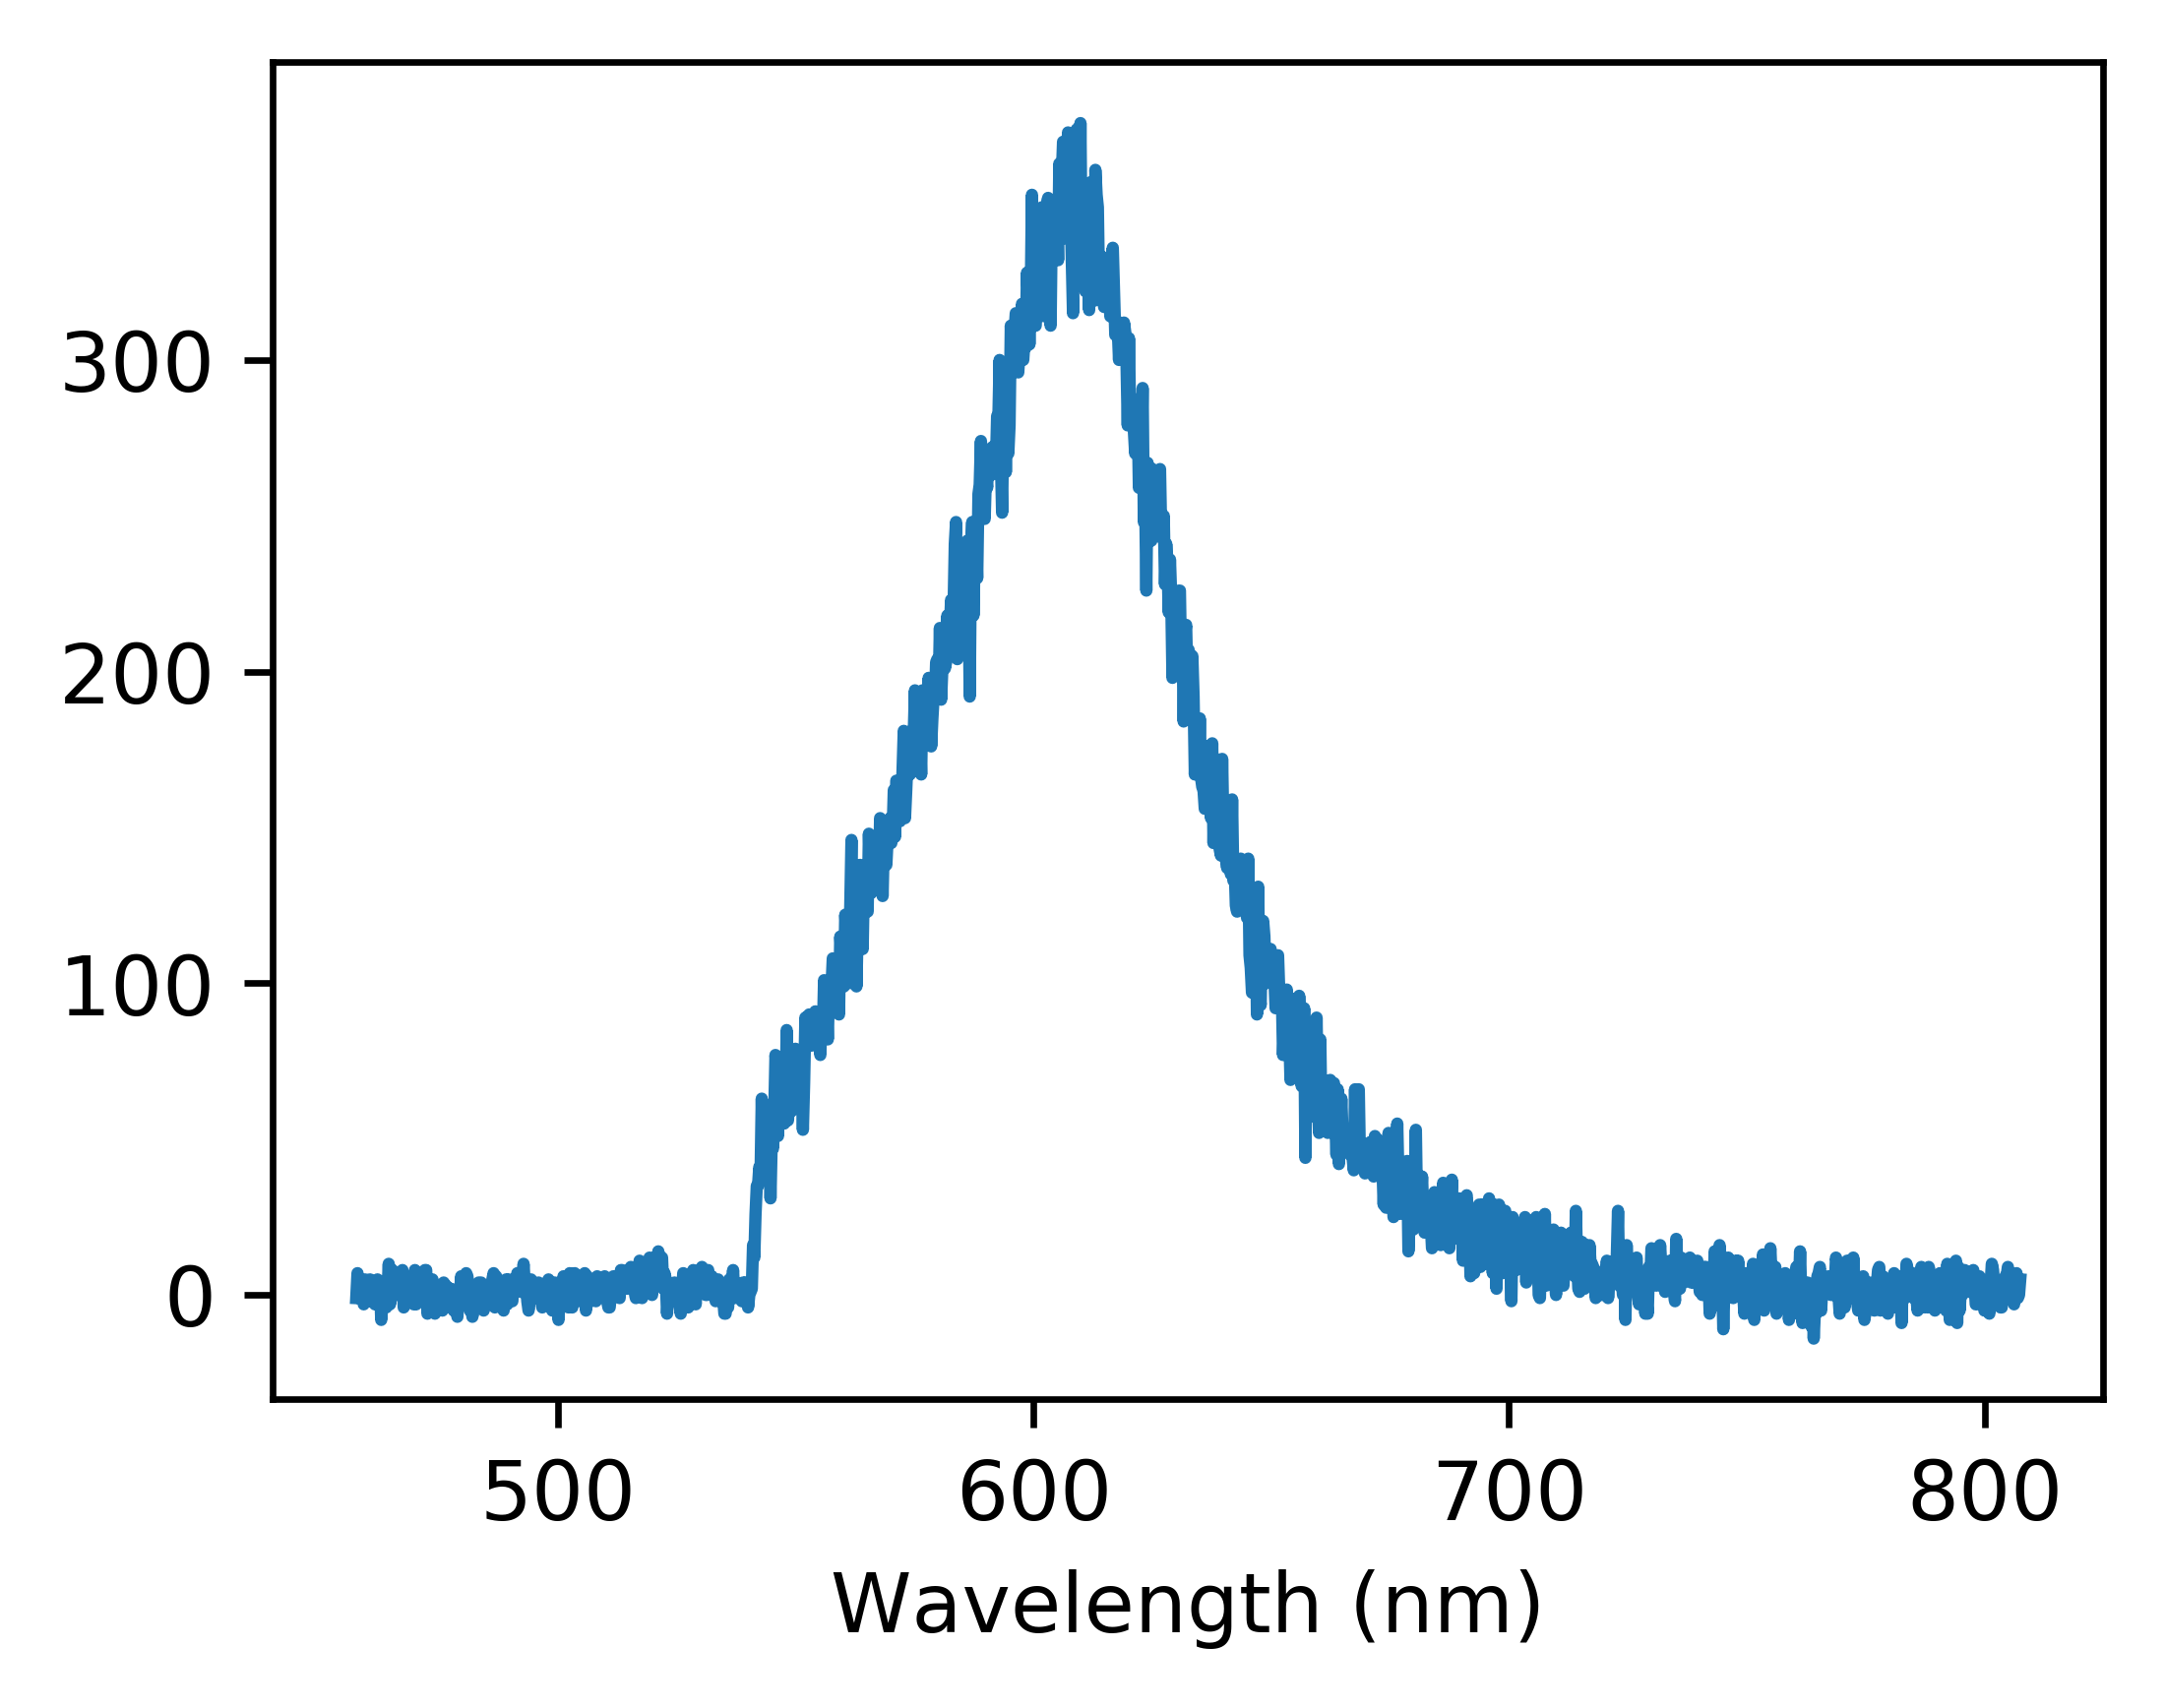

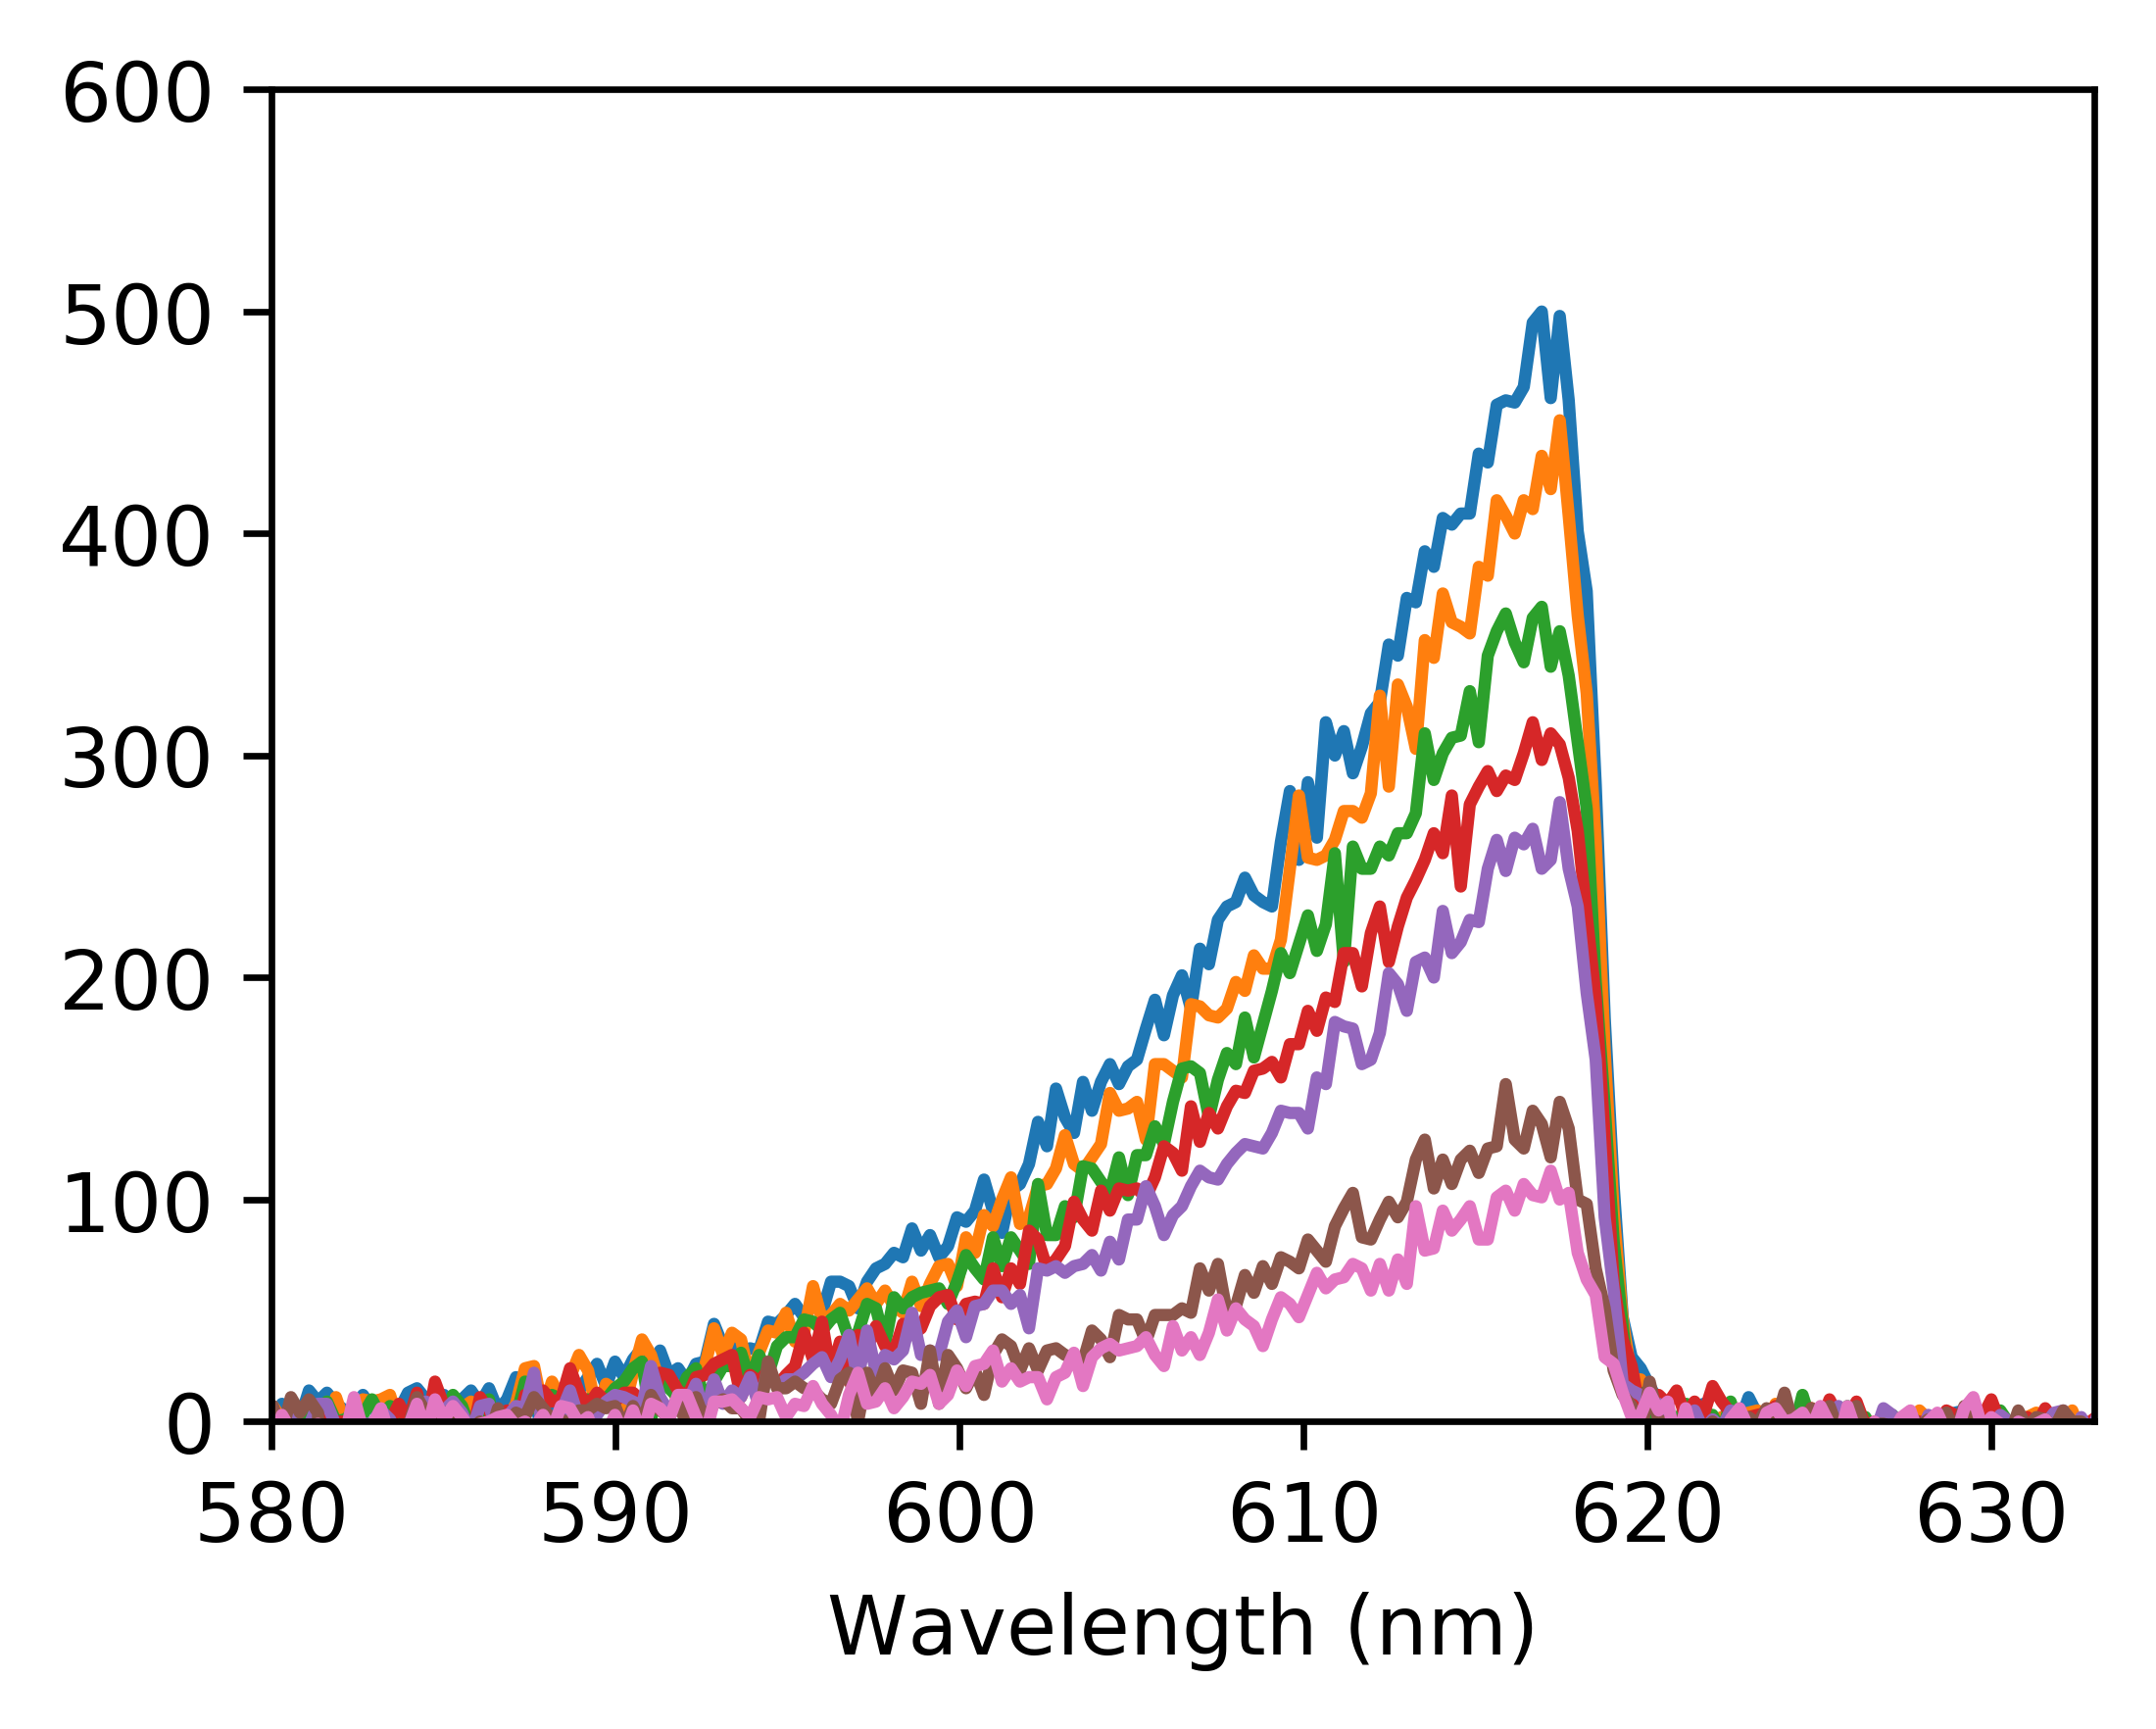

In [3]:
f = plt.figure(figsize=(4,3), dpi=600)
plt.plot(wavelength, spec_532-spec_532_bkg)
plt.xlabel('Wavelength (nm)')
plt.show()

f2 = plt.figure(figsize=(4,3), dpi=600)
plt.plot(wavelength, spec_633-spec_633_bkg)
plt.xlabel('Wavelength (nm)')
plt.ylim((0,600))
plt.xlim((580,633))
plt.show()

In [4]:
cut_wl = np.linspace(556,610,100)
popt = np.zeros((4, len(cut_wl)))
perr = np.zeros((len(cut_wl),))
j = 0
for i in cut_wl:
    r = wavelength > i
    to_fit = spec_532[r]-spec_532_bkg[r]
    popt[:,j], pcov = curve_fit(lorentziana, 1239.8/wavelength[r], to_fit,[5000, 1.95, 0.3, 0])
    chi_sq = np.sum((lorentziana(1239.8/wavelength[r], popt[0,j], popt[1,j], popt[2,j], popt[3,j])-to_fit)**2)
    perr[j] = chi_sq
    j += 1



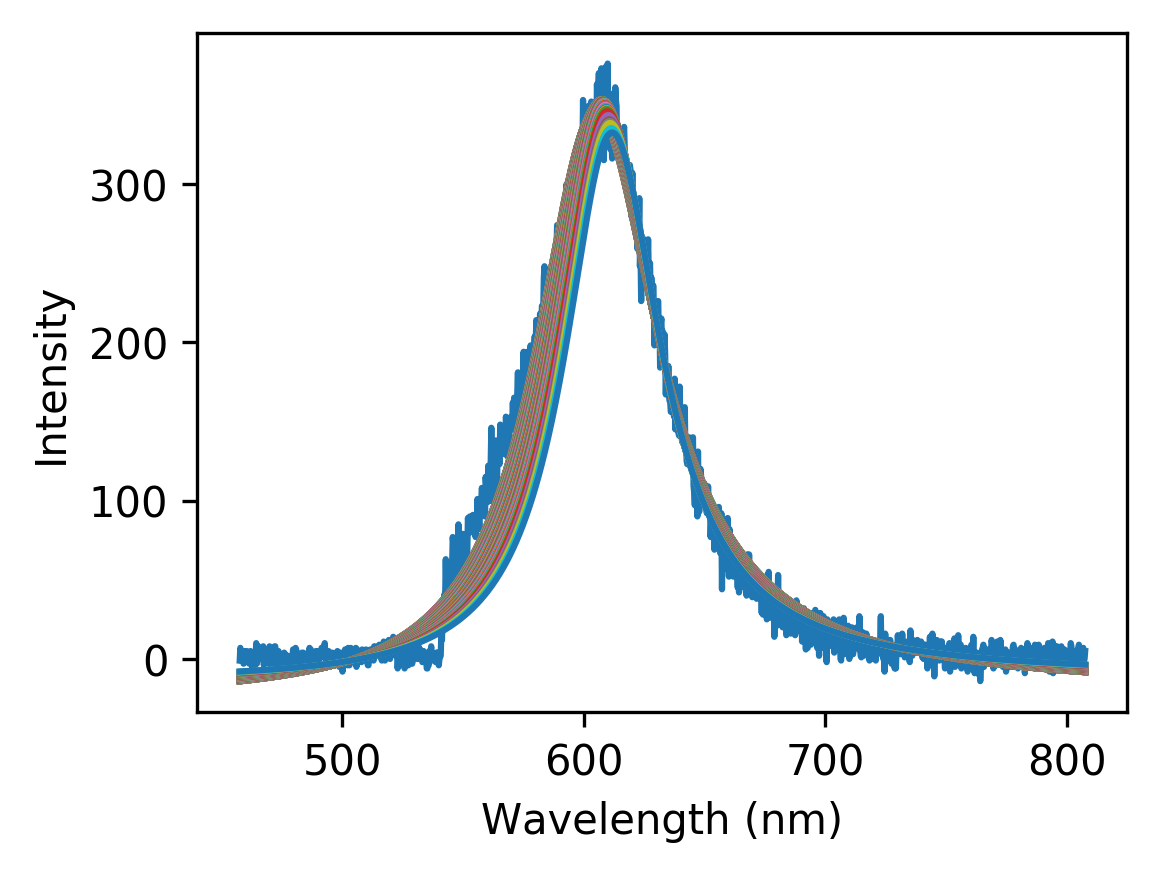

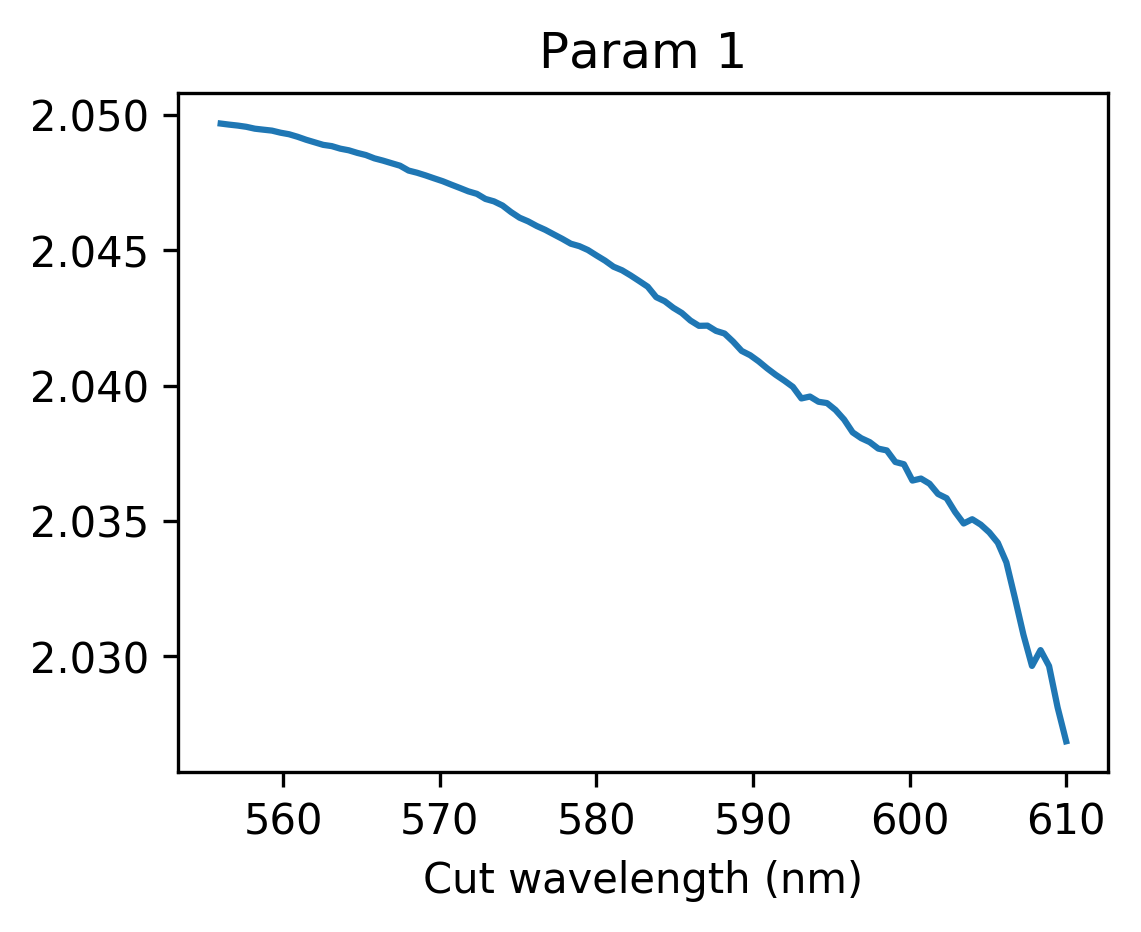

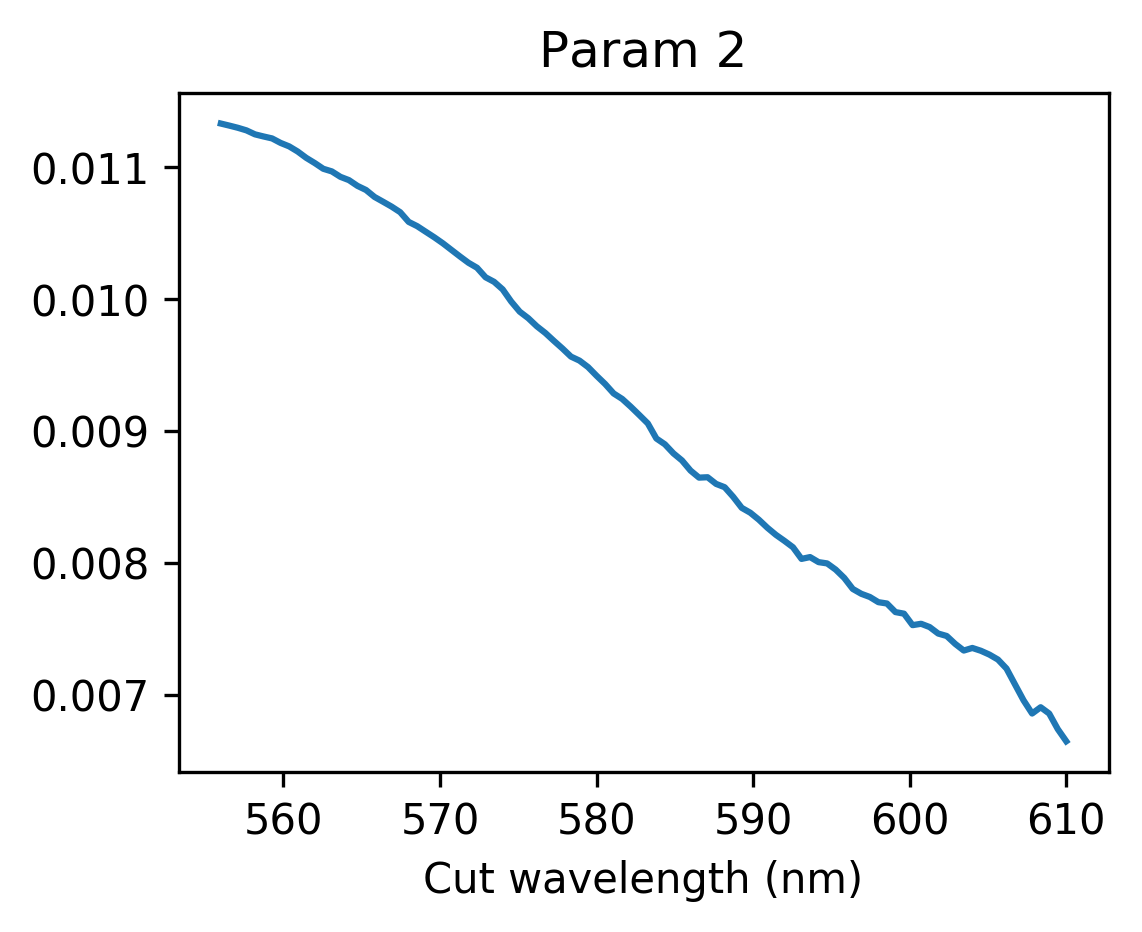

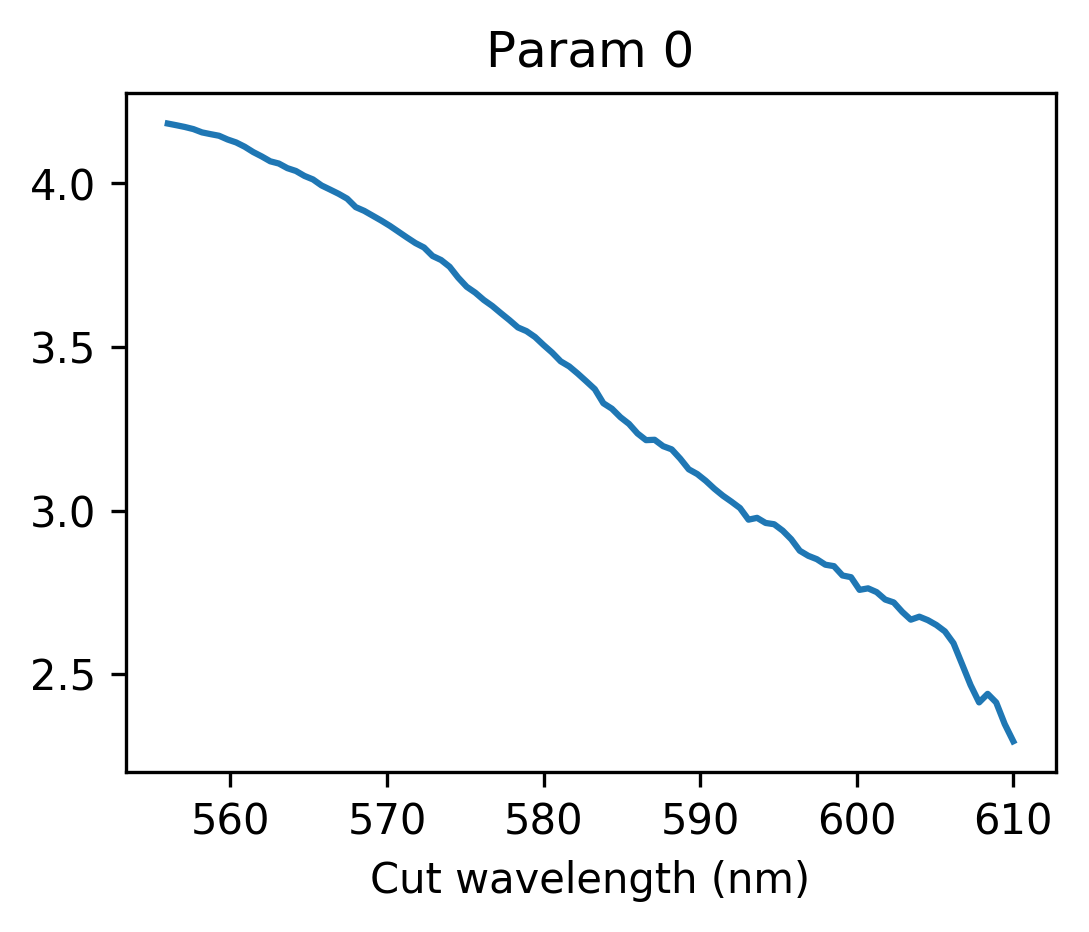

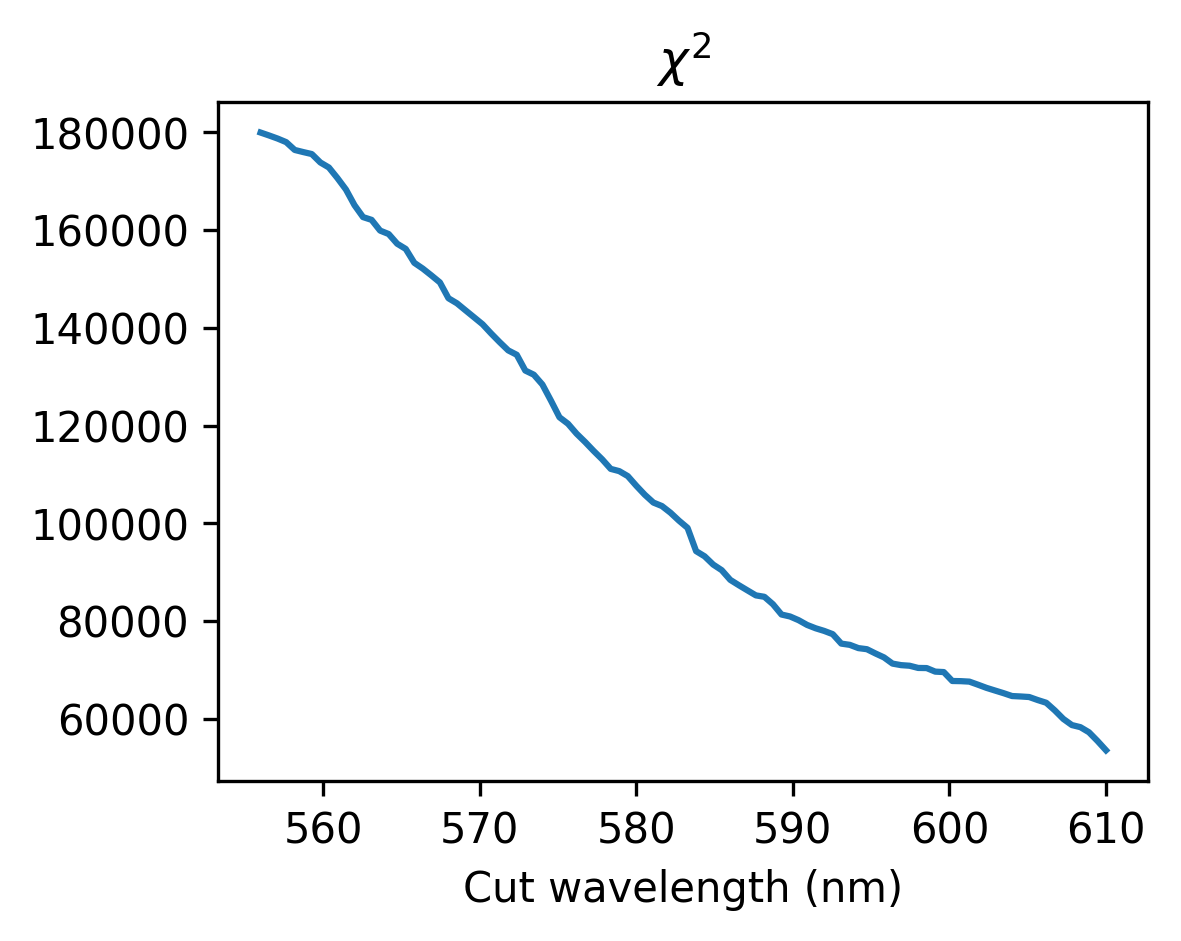

In [5]:
fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(wavelength, spec_532-spec_532_bkg)
for j in range(len(cut_wl)):
        plt.plot(wavelength, lorentziana(1239.8/wavelength, popt[0,j], popt[1,j], popt[2,j], popt[3,j]))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()

fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(cut_wl,popt[1,:])
plt.title('Param 1')
plt.xlabel('Cut wavelength (nm)')
plt.show()

fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(cut_wl,popt[2,:])
plt.title('Param 2')
plt.xlabel('Cut wavelength (nm)')
plt.show()

fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(cut_wl,popt[0,:])
plt.title('Param 0')
plt.xlabel('Cut wavelength (nm)')
plt.show()

fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(cut_wl, perr)
plt.title(r'$\chi^2$')
plt.xlabel('Cut wavelength (nm)')
plt.show()

In [6]:
T = np.zeros((2,len(power_sp),len(cut_wl)))
r = np.logical_and(wavelength>590, wavelength<614)
for l_range in range(len(cut_wl)):
    P = popt[:,l_range]
    for s_633 in range(len(power_sp)):
        to_fit = spec_633[:,s_633]-spec_633_bkg[:,s_633]
        T[:,s_633,l_range], pcov = curve_fit(temp_fitting, 1239.8/wavelength[r], to_fit[r], [1, 300])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


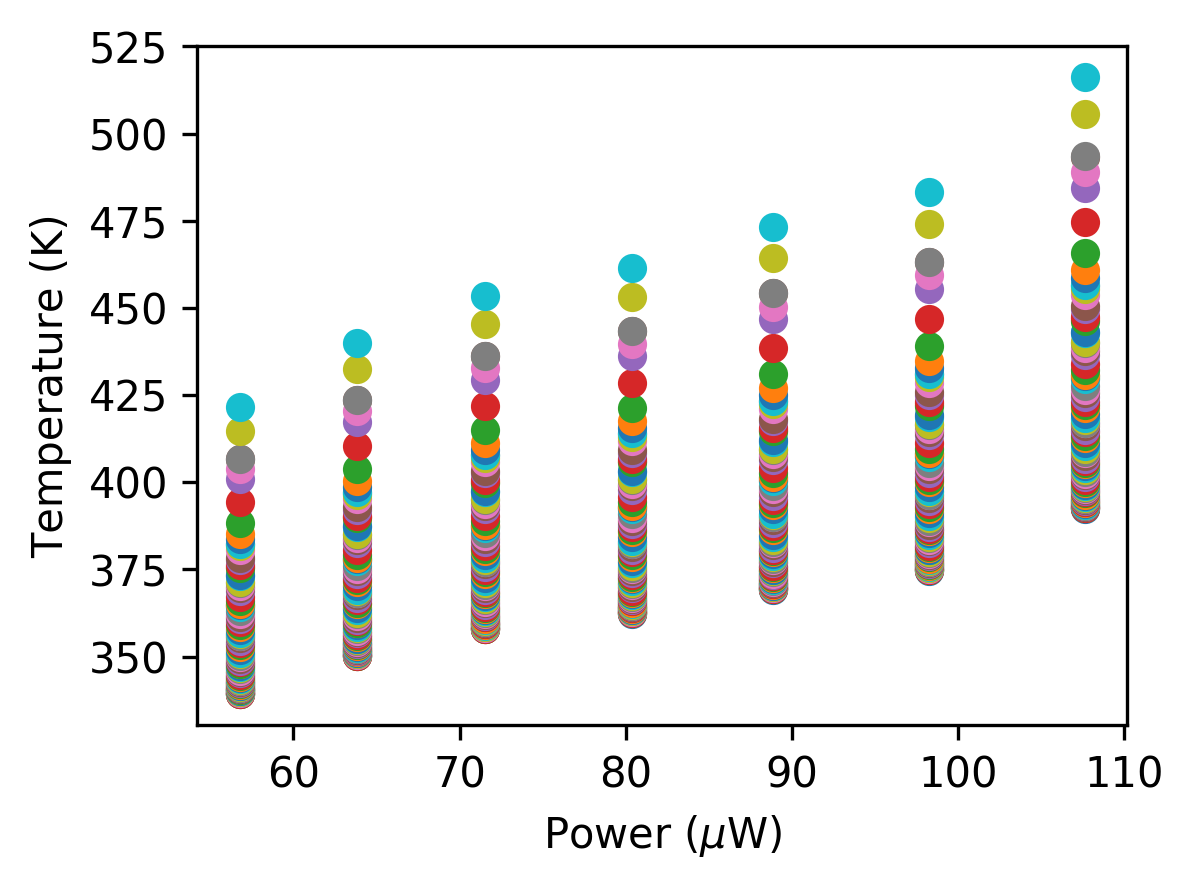

In [10]:
fig = plt.figure(figsize=(4,3), dpi=300)
plt.plot(power_sp[:], T[1,:,:],'o')
plt.xlabel('Power ($\mu$W)')
plt.ylabel('Temperature (K)')
plt.show()

In [8]:
ext_T = np.zeros((len(cut_wl)))
for l_range in range(len(cut_wl)):
    ext_T[l_range] = np.polyfit(power_sp[:], T[1,:,l_range], 1)[1]


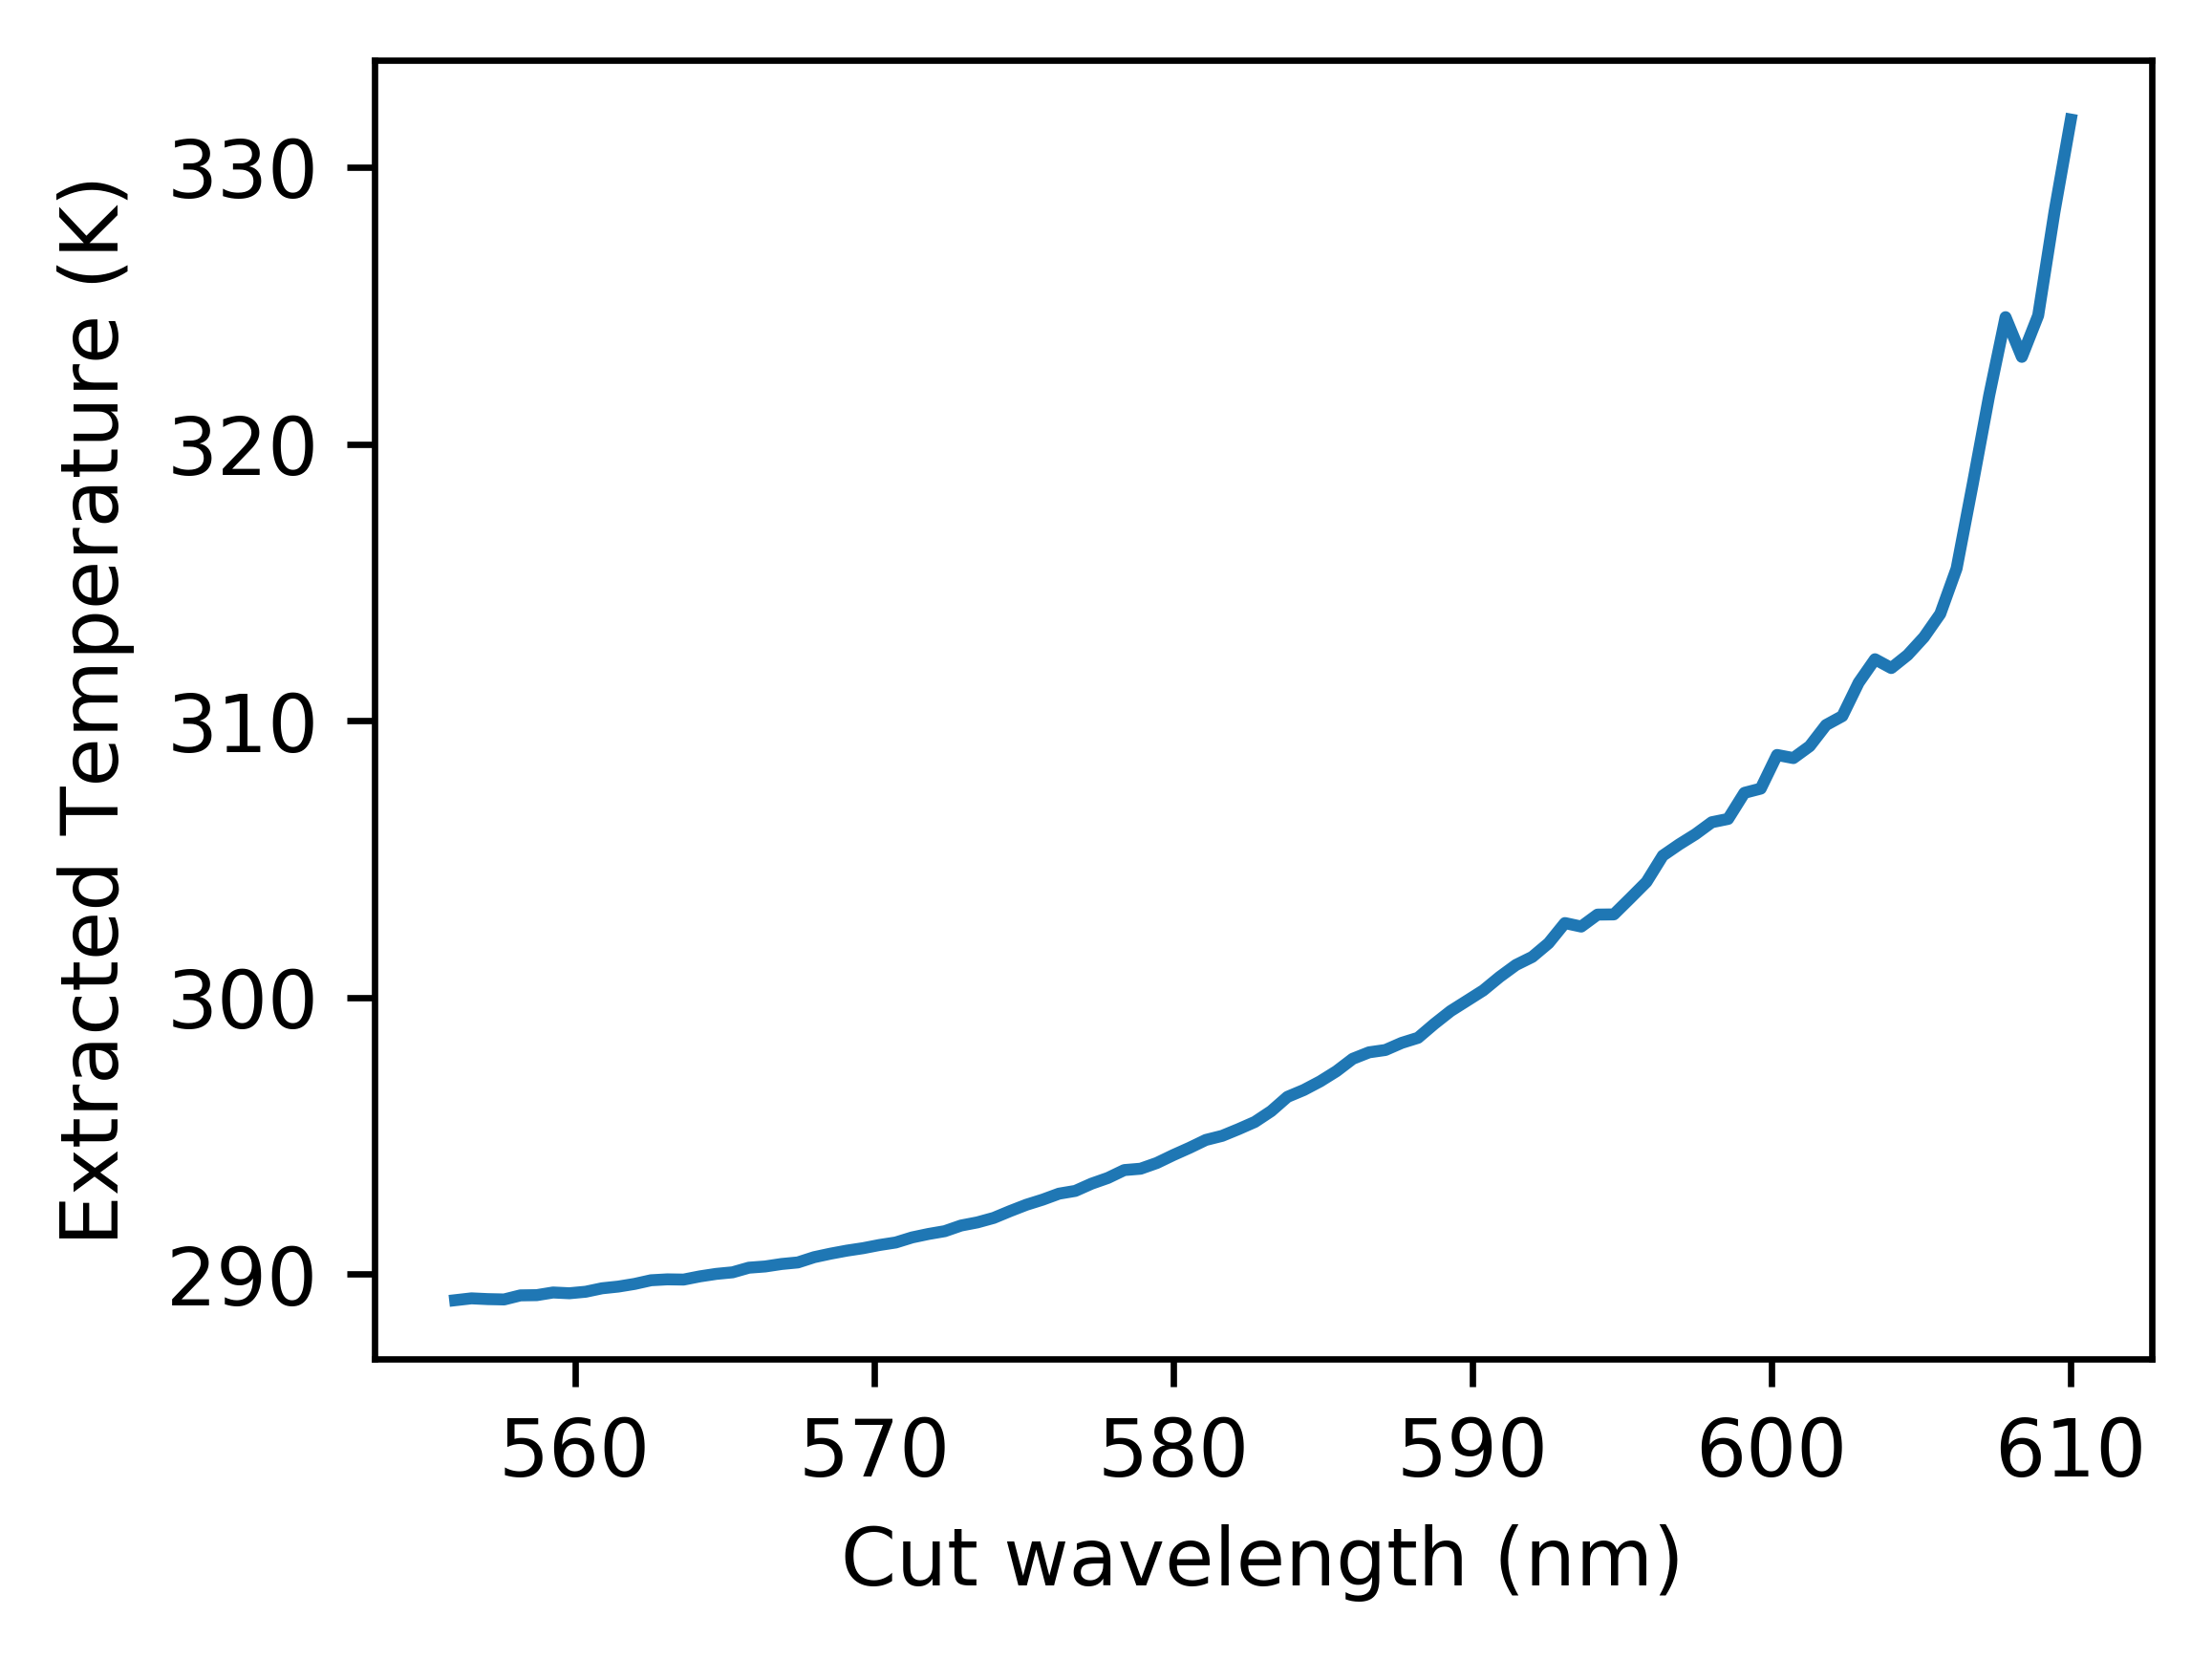

In [9]:
f = plt.figure(figsize=(4,3), dpi=600)
plt.plot(cut_wl,ext_T)
plt.xlabel('Cut wavelength (nm)')
plt.ylabel('Extracted Temperature (K)')
# plt.ylim((290,310))
# plt.show()
plt.savefig('03_Temp_Vs_Wl.svg')
plt.savefig('03_Temp_Vs_Wl.png')
plt.show()